In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from tensorflow.keras.applications import resnet
from keras.models import *
from keras.layers import *
import keras
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
import warnings
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.metrics import classification_report
import time
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_169.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_170.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_171.png
dataset\cell_images\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144348_cell_138.png
dataset\ce

dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_103.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_104.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_105.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_106.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_107.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_108.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_109.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_110.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_111.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_112.png
dataset\cell_images\cell_images\Parasitized\C129P90ThinF_IMG_20151004_133921_cell_113.png
dataset\ce

dataset\cell_images\cell_images\Parasitized\C138P99ThinF_IMG_20151005_173453_cell_113.png
dataset\cell_images\cell_images\Parasitized\C138P99ThinF_IMG_20151005_173453_cell_114.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182257_cell_178.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182257_cell_179.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182410_cell_170.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182410_cell_171.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182410_cell_172.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182410_cell_173.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182822_cell_161.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182822_cell_162.png
dataset\cell_images\cell_images\Parasitized\C139P100ThinF_IMG_20151005_182822_cell_163.png
d

dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_27.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_28.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_29.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_3.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_30.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_31.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_32.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_33.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_34.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_35.png
dataset\cell_images\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_36.png


dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_54.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_55.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_56.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_57.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_58.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_59.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_60.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_61.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141719_cell_62.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141809_cell_85.png
dataset\cell_images\cell_images\Parasitized\C189P150ThinF_IMG_20151203_141809_cell_86.png
dataset\ce

dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_55.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_56.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_57.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_58.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_59.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_6.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_7.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_8.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113139_cell_9.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113430_cell_1.png
dataset\cell_images\cell_images\Parasitized\C59P20thinF_IMG_20150803_113430_cell_10.png
dataset\cell_images\cell_images\Paras

dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_179.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_180.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_181.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_182.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_183.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_184.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_185.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_186.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_187.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_188.png
dataset\cell_images\cell_images\Parasitized\C81P42ThinF_IMG_20150817_120351_cell_189.png
dataset\cell_images\c

dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_43.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_44.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_45.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_46.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_47.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_48.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_5.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_6.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_7.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_8.png
dataset\cell_images\cell_images\Parasitized\C99P60ThinF_IMG_20150918_142334_cell_9.png
dataset\cell_images\cell_images\Paras

dataset\cell_images\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142951_cell_25.png
dataset\cell_images\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142951_cell_32.png
dataset\cell_images\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142951_cell_8.png
dataset\cell_images\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142951_cell_89.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_109.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_112.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_117.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_15.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_17.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_5.png
dataset\cell_images\cell_images\Uninfected\C131P92ThinF_IMG_20151004_145224_cell_64.png
dataset\cell_images\cell_images

dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_190.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_215.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_47.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_52.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_77.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190002_cell_98.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190421_cell_124.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190421_cell_160.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190421_cell_162.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190421_cell_163.png
dataset\cell_images\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190421_cell_172.png
dataset\cell_i

dataset\cell_images\cell_images\Uninfected\C1_thinF_IMG_20150604_105100_cell_69.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_106.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_115.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_121.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_128.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_129.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_132.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_177.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_179.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_186.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG_20150930_142848_cell_236.png
dataset\cell_images\cell_images\Uninfected\C201ThinF_IMG

dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_192.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_197.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_20.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_201.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_229.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_34.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_43.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_6.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_64.png
dataset\cell_images\cell_images\Uninfected\C225ThinF_IMG_20151112_113953_cell_89.png
dataset\cell_images\cell_images\Uninfected\C226ThinF_IMG_20151112_131255_cell_141.png
dataset\cell_images\cell_images\Uninfected\C226ThinF_IMG_2015

dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_112.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_115.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_2.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_24.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_40.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210123_cell_98.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210309_cell_1.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210309_cell_116.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210309_cell_18.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210309_cell_33.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF_IMG_20151130_210309_cell_42.png
dataset\cell_images\cell_images\Uninfected\C46P7ThinF

dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_115.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_117.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_126.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_129.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_135.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_136.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_42.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_49.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143524_cell_78.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143650_cell_105.png
dataset\cell_images\cell_images\Uninfected\C77P38ThinF_IMG_20150602_143650_cell_111.png
dataset\cell_images\cell_images\Uni

dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_150838_cell_145.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_150838_cell_47.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_150838_cell_57.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_150838_cell_82.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_102.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_11.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_113.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_119.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_142.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_26.png
dataset\cell_images\cell_images\Uninfected\C97P58ThinF_IMG_20150917_151320_cell_51.png
dataset\cell_images\cell_images\Uninfe

dataset\cell_images\Parasitized\C122P83ThinF_IMG_20151002_145415_cell_169.png
dataset\cell_images\Parasitized\C122P83ThinF_IMG_20151002_145751_cell_156.png
dataset\cell_images\Parasitized\C122P83ThinF_IMG_20151002_150207_cell_159.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_197.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_198.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_199.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_200.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_201.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_202.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_203.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_204.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931_cell_205.png
dataset\cell_images\Parasitized\C123P84ThinF_IMG_20151002_150931

dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_121952_cell_123.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122331_cell_102.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122331_cell_103.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122449_cell_133.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122449_cell_134.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_120.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_121.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_122.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_123.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_124.png
dataset\cell_images\Parasitized\C134P95ThinF_IMG_20151005_122552_cell_125.png
dataset\cell_images\Parasitized\C135P96ThinF_IMG_20151005_123441_cell_192.png
dataset\cell_images\Parasitized\C135P96ThinF_IMG_20151005_123441

dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_19.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_2.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_20.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_21.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_22.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_23.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_24.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_25.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_26.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_27.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_28.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_29.png
dataset\cell_images\Parasitized\C180P141NThinF_IMG_20

dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_83.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_84.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_85.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_86.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_87.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_88.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_89.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_90.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_91.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_92.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_93.png
dataset\cell_images\Parasitized\C39P4thinF_original_IMG_20150622_105102_cell

dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_3.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_4.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_5.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_6.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_7.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_8.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105639_cell_9.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_119.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_120.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_121.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_122.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_123.png
dataset\cell_images\Parasitized\C60P21thinF_IMG_20150804_105955_cell_124.png
dataset\cell_

dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_183.png
dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_184.png
dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_185.png
dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_186.png
dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_187.png
dataset\cell_images\Parasitized\C87P48ThinF_IMG_20150820_144855_cell_188.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_150141_cell_218.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_150141_cell_219.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_150141_cell_220.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_150724_cell_244.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_151451_cell_206.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_151626_cell_188.png
dataset\cell_images\Parasitized\C88P49ThinF_IMG_20150820_151626_cell_189.png

dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_48.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_65.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_108.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_120.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_125.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_131.png
dataset\cell_images\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_2.png
datase

dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_128.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_23.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_35.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_60.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_75.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_82.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_141825_cell_86.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_25.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_3.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_30.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_31.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_58.png
dataset\cell_images\Uninfected\C130P91ThinF_IMG_20151004_142109_cell_8.png
dataset\cell_

dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_16.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_194.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_218.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_219.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_237.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_3.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_43.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_190812_cell_6.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_191301_cell_103.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_191301_cell_12.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_191301_cell_137.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_191301_cell_146.png
dataset\cell_images\Uninfected\C159P120ThinF_IMG_20151115_191301_cell_1

dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_140917_cell_272.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_140917_cell_297.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_140917_cell_52.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_140917_cell_74.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_140917_cell_90.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_100.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_111.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_13.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_156.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_173.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_184.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_215.png
dataset\cell_images\Uninfected\C206ThinF_IMG_20151029_141047_cell_222.png
dataset\cell_images\Uninfected\C206ThinF_I

dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_128.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_134.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_152.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_163.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_184.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_19.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_212.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_23.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_43.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153246_cell_46.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153359_cell_104.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153359_cell_123.png
dataset\cell_images\Uninfected\C231ThinF_IMG_20151112_153359_cell_147.png
dataset\cell_images\Uninfected\C231ThinF_I

dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_231.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_29.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_43.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_47.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_52.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_71.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122108_cell_92.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_128.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_152.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_162.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_166.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_204.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_122227_cell_216.png
dataset\cell_images\Uninfected\C5NThinF_IMG_20150609_1222

dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_15.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_153.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_168.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_170.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_181.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_213.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_243.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_252.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_260.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_62.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_87.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_89.png
dataset\cell_images\Uninfected\C90P51ThinF_IMG_20150821_115700_cell_98.png
dataset\cell_imag

In [3]:
def data_prep(parasitized,uninfected):

    parasitized= ["dataset/cell_images/cell_images/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected= ["dataset/cell_images/cell_images/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized)*['parasitized'] + len(uninfected)*['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})


df = data_prep(os.listdir('dataset/cell_images/cell_images/Parasitized/'), os.listdir('dataset/cell_images/cell_images/Uninfected/'))
df.head()

Image_Path       Labels
0  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
1  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
2  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
3  dataset/cell_images/cell_images/Parasitized/C1...  parasitized
4  dataset/cell_images/cell_images/Parasitized/C1...  parasitized

In [4]:
print(os.listdir("dataset/cell_images/cell_images/"))

['Parasitized', 'Uninfected']


Parasitized Images: 



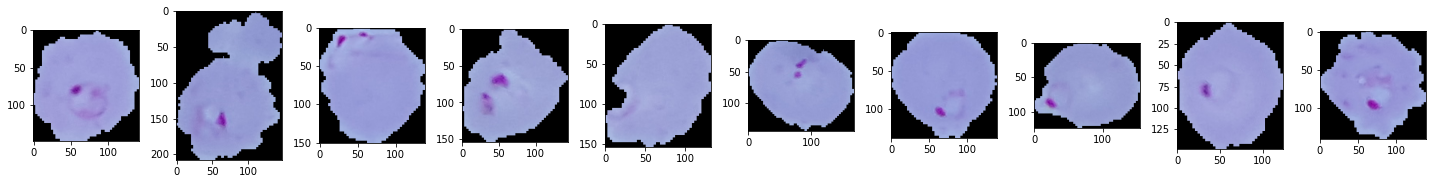


Uninfected Images: 



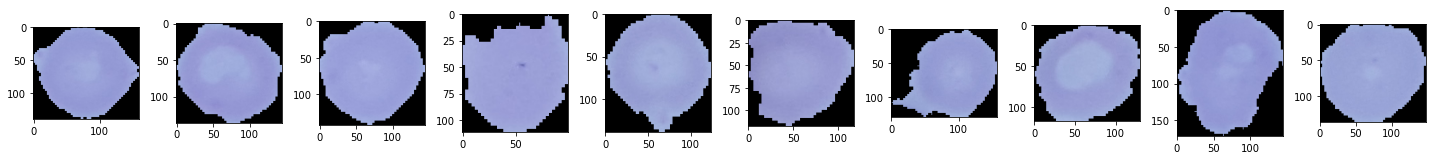

In [5]:
print("Parasitized Images: ")
print()
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = cv2.imread(df[df['Labels'] == 'parasitized']['Image_Path'][i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()


print()
print("Uninfected Images: ")
print()
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(1, 10, i+1)
    img = cv2.imread(df[df['Labels'] == 'uninfected']['Image_Path'].reset_index(drop=True)[i])
    plt.imshow(img)
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of samples according to the categories')

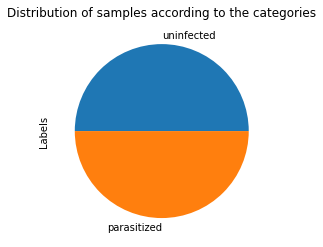

In [6]:
df['Labels'].value_counts().plot(kind = 'pie')
plt.title('Distribution of samples according to the categories')

In [7]:

train, test = train_test_split(df, test_size = .30)

img_datagen = ImageDataGenerator(rotation_range=10,
            width_shift_range=0.2, 
            height_shift_range=0.2,
            zoom_range=0.2, 
            horizontal_flip=True,
            fill_mode='nearest',
            brightness_range=[0.2,1.2], 
            validation_split=0.3)

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Image_Path', y_col='Labels',class_mode='binary',  target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='validation')
y_test =  x_test.labels

                               
                               
my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=5),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


Found 13504 validated image filenames belonging to 2 classes.
Found 2480 validated image filenames belonging to 2 classes.


D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [8]:
def plot_loss_and_accuracy(mo_fit,model):
    accuracy = mo_fit.history['accuracy']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_accuracy']



    plt.figure(figsize=(15, 7))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()
    
    
    y_pred_model = model.predict(x_test)
    y_pred_model = y_pred_model[:,0]>0.5
   
    print(classification_report(y_pred = y_pred_model, y_true = y_test))

# RESNET 50


In [9]:
def resnet_model(df, train, test, my_callbacks):
    
    resnet_model=resnet.ResNet50(weights='imagenet',include_top=False,input_shape=(64,64,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=5e-5),loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100,
    epochs = 10, callbacks=my_callbacks)
    
    
    return model_history,model
    


In [10]:
x,y = resnet_model(df, train, test, my_callbacks)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 27,783,041
Trainable params: 27,729,921
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/10
50/50 [==============================] - 46s 733ms/step - loss: 0.9631 - accuracy: 0.5621

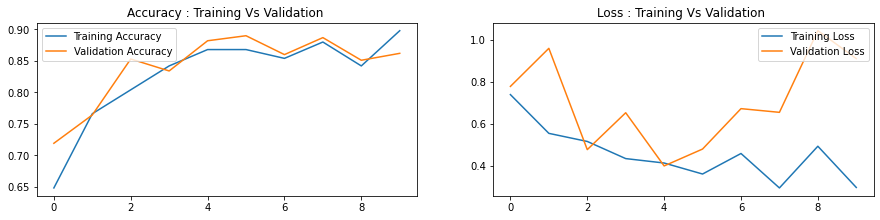

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1240
           1       0.81      0.98      0.89      1240

    accuracy                           0.87      2480
   macro avg       0.89      0.87      0.87      2480
weighted avg       0.89      0.87      0.87      2480



In [11]:
plot_loss_and_accuracy(x,y)

In [9]:
x_train_full =  img_datagen.flow_from_dataframe(dataframe = df,  x_col='Image_Path', y_col='Labels',  class_mode='binary',target_size=(64,64), shuffle=False, batch_size=10, seed=10, subset='training')

Found 19291 validated image filenames belonging to 2 classes.


D:\anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [10]:
y_train_full = df.Labels

In [14]:
loaded_resnet = load_model("resnet.pkl")

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


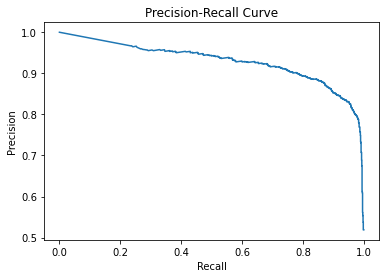

In [15]:
y_score = loaded_resnet.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [16]:
y_pred = loaded_resnet.predict(x_test)
for i in range(0,2480,1):
    if y_pred[i] >= 0.5:
        y_pred[i]=int(1)
    else:
        y_pred[i]=int(0)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 934,  306],
       [  24, 1216]], dtype=int64)

In [17]:
from datetime import datetime
import time
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_resnet.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  1 148.71294355392456
Time:  2 144.61165261268616
Time:  3 141.90039944648743
Time:  4 126.32851314544678
Time:  5 125.51439428329468
Time:  6 122.7548418045044
Time:  7 123.33573055267334
Time:  8 124.72829008102417
Time:  9 125.32446885108948
Time:  10 131.41453671455383


In [18]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  131.46257710456848


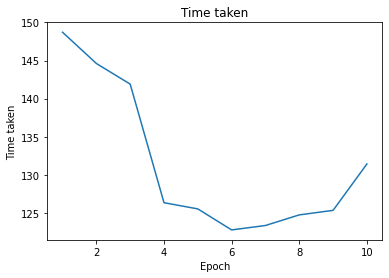

In [19]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# VGG 19

In [20]:
def vgg19_model(df, train, test, my_callbacks):
   
    
    vgg19_model = VGG19(input_shape=(64,64,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=5e-5),loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    model_history = model.fit(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 10 , callbacks=my_callbacks)
    
    return model_history,model


In [21]:
x,y= vgg19_model(df, train, test, my_callbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 21,073,985
Trainable params: 21,073,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
50/50 [==============================] - 54s 1s/step - loss: 1.6118 - accuracy: 0.5074 - val

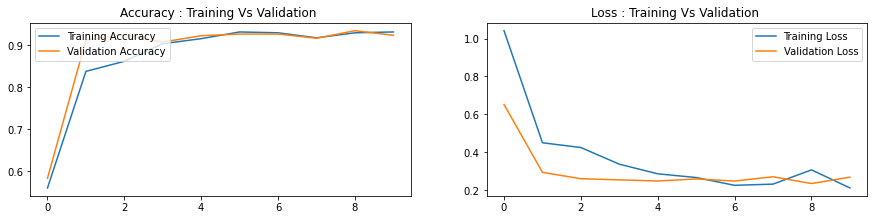

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1240
           1       0.87      0.99      0.93      1240

    accuracy                           0.92      2480
   macro avg       0.93      0.92      0.92      2480
weighted avg       0.93      0.92      0.92      2480



In [22]:
plot_loss_and_accuracy(x,y)

In [23]:
loaded_vgg = load_model("vgg.pkl")

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


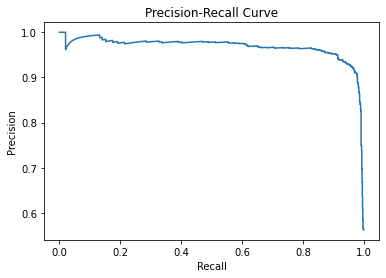

In [24]:
y_score = loaded_vgg.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [25]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_vgg.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  1 283.80928111076355
Time:  2 262.6016125679016
Time:  3 259.1206307411194
Time:  4 260.5035836696625
Time:  5 258.2208330631256
Time:  6 256.11393904685974
Time:  7 257.1814224720001
Time:  8 281.77247977256775
Time:  9 259.95605087280273
Time:  10 256.7235634326935


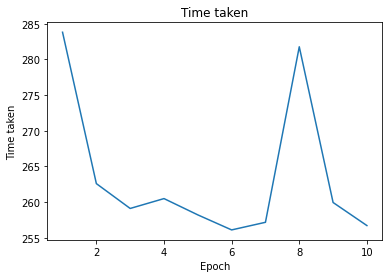

In [26]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

In [27]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  263.6003396749496


# INCEPTION V3


In [13]:
def inception_v3_model(df, train, test, my_callbacks):
    
    vgg19_model = VGG19(input_shape=(64,64,3), weights='imagenet',include_top=False)
    model=Sequential()
    model.add(vgg19_model)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.RMSprop(lr=5e-5),loss='binary_crossentropy',metrics=['accuracy'])
    print(model.summary())
    model_history = model.fit(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 10 , callbacks=my_callbacks)
    
    return model_history,model
    


In [14]:
x,y = inception_v3_model(df, train, test, my_callbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 21,073,985
Trainable params: 21,073,985
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
50/50 [==============================] - 51s 987ms/step - loss: 2.1794 - accuracy: 0.5902 - v

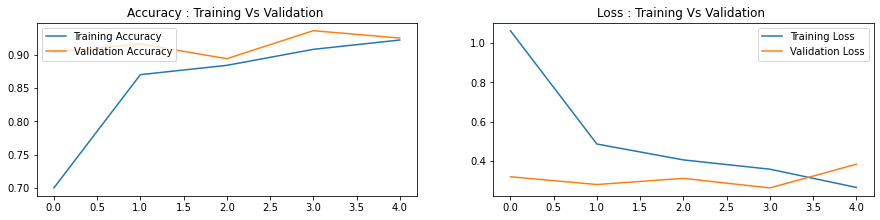

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1233
           1       0.92      0.96      0.94      1247

    accuracy                           0.94      2480
   macro avg       0.94      0.94      0.94      2480
weighted avg       0.94      0.94      0.94      2480



In [15]:
plot_loss_and_accuracy(x,y)

In [33]:
loaded_inception = load_model("inception.pkl")

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


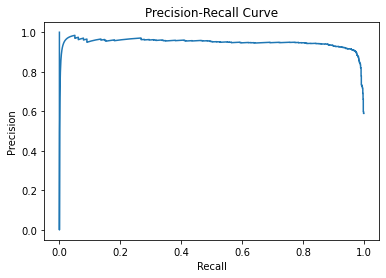

In [34]:
y_score = loaded_inception.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [35]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,10,1):
    start = time.time()
    y_train_full_pred = loaded_inception.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

Time:  263.2672128677368
Time:  274.7216589450836
Time:  261.88244700431824
Time:  286.92632961273193
Time:  270.91843843460083
Time:  250.88658452033997
Time:  256.9654664993286
Time:  250.80386567115784
Time:  252.39141511917114
Time:  248.42238855361938


In [36]:
print("Average time taken = ",sum(time_array)/len(time_array))

Average time taken =  261.71858072280884


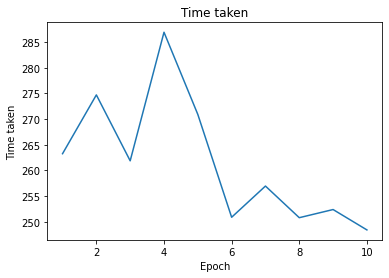

In [37]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()

# DEPTHWISE SEPERABLE MODEL

In [9]:
import pickle
import weakref
def ds_model(df, train, test, my_callbacks):
    model = Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(32,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))

    model.add(SeparableConv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(lr=0.0007), loss='binary_crossentropy', metrics=['accuracy'])
    print(model.summary())
    
    model_history = model.fit_generator(
    x_train,
    steps_per_epoch=50,
    validation_data=x_test,
    validation_steps=100, 
    epochs = 1000 , callbacks=my_callbacks)
    
    model.save("custom.pkl")

    return model_history,model


In [10]:
x,y = ds_model(df, train, test, my_callbacks)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 12, 12, 32)        1

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 6s 96ms/step - loss: 1.4483 - accuracy: 0.4666 - val_loss: 0.6916 - val_accuracy: 0.5290
Epoch 2/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.7425 - accuracy: 0.5207 - val_loss: 0.6919 - val_accuracy: 0.5280
Epoch 3/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.7204 - accuracy: 0.4801 - val_loss: 0.6898 - val_accuracy: 0.5530
Epoch 4/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.6965 - accuracy: 0.5151 - val_loss: 0.6910 - val_accuracy: 0.5370
Epoch 5/1000
50/50 [==============================] - 4s 79ms/step - loss: 0.6940 - accuracy: 0.4927 - val_loss: 0.6895 - val_accuracy: 0.5490
Epoch 6/1000
50/50 [==============================] - 4s 77ms/step - loss: 0.6812 - accuracy: 0.5472 - val_loss: 0.6900 - val_accuracy: 0.5700
Epoch 7/1000
50/50 [==============================] - 4s 84ms/step - loss: 0.7014 - accuracy: 0.5047 - val_loss: 0.6889 - val_accuracy: 0.5490
Epoch 8/1000

50/50 [==============================] - 3s 69ms/step - loss: 0.3691 - accuracy: 0.8595 - val_loss: 0.2943 - val_accuracy: 0.8790
Epoch 59/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3190 - accuracy: 0.8715 - val_loss: 0.3060 - val_accuracy: 0.8910
Epoch 60/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2895 - accuracy: 0.9156 - val_loss: 0.2724 - val_accuracy: 0.8970
Epoch 61/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3066 - accuracy: 0.8861 - val_loss: 0.3140 - val_accuracy: 0.8940
Epoch 62/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.3457 - accuracy: 0.8583 - val_loss: 0.3254 - val_accuracy: 0.8930
Epoch 63/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2826 - accuracy: 0.9229 - val_loss: 0.2623 - val_accuracy: 0.9070
Epoch 64/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2847 - accuracy: 0.9093 - val_loss: 0.2626 - val_accuracy: 0.9080
Epoch 

Epoch 115/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2703 - accuracy: 0.9159 - val_loss: 0.2949 - val_accuracy: 0.8900
Epoch 116/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2927 - accuracy: 0.8944 - val_loss: 0.2851 - val_accuracy: 0.8910
Epoch 117/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2726 - accuracy: 0.9122 - val_loss: 0.2815 - val_accuracy: 0.8930
Epoch 118/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2709 - accuracy: 0.8790 - val_loss: 0.3056 - val_accuracy: 0.8870
Epoch 119/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2662 - accuracy: 0.9144 - val_loss: 0.2816 - val_accuracy: 0.9030
Epoch 120/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2654 - accuracy: 0.9189 - val_loss: 0.2753 - val_accuracy: 0.8920
Epoch 121/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2624 - accuracy: 0.9216 - val_loss: 0.2752 - val_ac

50/50 [==============================] - 3s 67ms/step - loss: 0.3429 - accuracy: 0.8767 - val_loss: 0.2692 - val_accuracy: 0.9000
Epoch 172/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2339 - accuracy: 0.9309 - val_loss: 0.2657 - val_accuracy: 0.9030
Epoch 173/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2450 - accuracy: 0.9366 - val_loss: 0.2638 - val_accuracy: 0.9130
Epoch 174/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2302 - accuracy: 0.9322 - val_loss: 0.2596 - val_accuracy: 0.9090
Epoch 175/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3278 - accuracy: 0.8823 - val_loss: 0.2554 - val_accuracy: 0.9170
Epoch 176/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2458 - accuracy: 0.9117 - val_loss: 0.2485 - val_accuracy: 0.9170
Epoch 177/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2140 - accuracy: 0.9265 - val_loss: 0.2671 - val_accuracy: 0.9090


50/50 [==============================] - 3s 69ms/step - loss: 0.2339 - accuracy: 0.9112 - val_loss: 0.2353 - val_accuracy: 0.9190
Epoch 228/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2479 - accuracy: 0.9401 - val_loss: 0.2649 - val_accuracy: 0.8960
Epoch 229/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3652 - accuracy: 0.8858 - val_loss: 0.3106 - val_accuracy: 0.8860
Epoch 230/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2459 - accuracy: 0.9080 - val_loss: 0.2522 - val_accuracy: 0.9130
Epoch 231/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2849 - accuracy: 0.9114 - val_loss: 0.2556 - val_accuracy: 0.9100
Epoch 232/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2182 - accuracy: 0.9388 - val_loss: 0.2476 - val_accuracy: 0.9090
Epoch 233/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.1780 - accuracy: 0.9408 - val_loss: 0.2590 - val_accuracy: 0.9090


50/50 [==============================] - 3s 68ms/step - loss: 0.3015 - accuracy: 0.8997 - val_loss: 0.2376 - val_accuracy: 0.9150
Epoch 284/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2779 - accuracy: 0.8990 - val_loss: 0.2554 - val_accuracy: 0.9090
Epoch 285/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2399 - accuracy: 0.9123 - val_loss: 0.2405 - val_accuracy: 0.9180
Epoch 286/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2407 - accuracy: 0.8970 - val_loss: 0.2238 - val_accuracy: 0.9270
Epoch 287/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2118 - accuracy: 0.9279 - val_loss: 0.2642 - val_accuracy: 0.9160
Epoch 288/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3052 - accuracy: 0.9020 - val_loss: 0.2274 - val_accuracy: 0.9300
Epoch 289/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2295 - accuracy: 0.9298 - val_loss: 0.2463 - val_accuracy: 0.9160


50/50 [==============================] - 3s 70ms/step - loss: 0.2520 - accuracy: 0.9233 - val_loss: 0.2338 - val_accuracy: 0.9190
Epoch 340/1000
50/50 [==============================] - 4s 73ms/step - loss: 0.2435 - accuracy: 0.9316 - val_loss: 0.2314 - val_accuracy: 0.9200
Epoch 341/1000
50/50 [==============================] - 4s 74ms/step - loss: 0.2000 - accuracy: 0.9256 - val_loss: 0.2227 - val_accuracy: 0.9280
Epoch 342/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3412 - accuracy: 0.9022 - val_loss: 0.2370 - val_accuracy: 0.9110
Epoch 343/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2481 - accuracy: 0.9100 - val_loss: 0.2499 - val_accuracy: 0.9070
Epoch 344/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2372 - accuracy: 0.9343 - val_loss: 0.2097 - val_accuracy: 0.9290
Epoch 345/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3739 - accuracy: 0.9269 - val_loss: 0.2452 - val_accuracy: 0.9220


50/50 [==============================] - 3s 67ms/step - loss: 0.2442 - accuracy: 0.9050 - val_loss: 0.2267 - val_accuracy: 0.9200
Epoch 396/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2664 - accuracy: 0.9234 - val_loss: 0.2389 - val_accuracy: 0.9210
Epoch 397/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2479 - accuracy: 0.9234 - val_loss: 0.2255 - val_accuracy: 0.9230
Epoch 398/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2529 - accuracy: 0.9204 - val_loss: 0.2438 - val_accuracy: 0.9170
Epoch 399/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2242 - accuracy: 0.9209 - val_loss: 0.2140 - val_accuracy: 0.9220
Epoch 400/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2188 - accuracy: 0.9111 - val_loss: 0.2397 - val_accuracy: 0.9190
Epoch 401/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2466 - accuracy: 0.9156 - val_loss: 0.2373 - val_accuracy: 0.9120


50/50 [==============================] - 3s 67ms/step - loss: 0.3038 - accuracy: 0.8778 - val_loss: 0.2384 - val_accuracy: 0.9200
Epoch 452/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.3043 - accuracy: 0.9011 - val_loss: 0.2303 - val_accuracy: 0.9230
Epoch 453/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2166 - accuracy: 0.9212 - val_loss: 0.2515 - val_accuracy: 0.9090
Epoch 454/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.1741 - accuracy: 0.9514 - val_loss: 0.2559 - val_accuracy: 0.9070
Epoch 455/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2117 - accuracy: 0.9301 - val_loss: 0.2341 - val_accuracy: 0.9150
Epoch 456/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.1765 - accuracy: 0.9430 - val_loss: 0.2223 - val_accuracy: 0.9220
Epoch 457/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2185 - accuracy: 0.9292 - val_loss: 0.2222 - val_accuracy: 0.9160


50/50 [==============================] - 3s 67ms/step - loss: 0.3046 - accuracy: 0.8704 - val_loss: 0.2380 - val_accuracy: 0.9160
Epoch 508/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2414 - accuracy: 0.9182 - val_loss: 0.2079 - val_accuracy: 0.9330
Epoch 509/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.1919 - accuracy: 0.9308 - val_loss: 0.2250 - val_accuracy: 0.9240
Epoch 510/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2216 - accuracy: 0.9210 - val_loss: 0.2569 - val_accuracy: 0.9080
Epoch 511/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2281 - accuracy: 0.9309 - val_loss: 0.2663 - val_accuracy: 0.9110
Epoch 512/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2214 - accuracy: 0.9293 - val_loss: 0.2265 - val_accuracy: 0.9250
Epoch 513/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2462 - accuracy: 0.9123 - val_loss: 0.2364 - val_accuracy: 0.9220


50/50 [==============================] - 3s 67ms/step - loss: 0.1629 - accuracy: 0.9595 - val_loss: 0.2239 - val_accuracy: 0.9190
Epoch 564/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2629 - accuracy: 0.9254 - val_loss: 0.2161 - val_accuracy: 0.9230
Epoch 565/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2097 - accuracy: 0.9176 - val_loss: 0.2438 - val_accuracy: 0.9130
Epoch 566/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2632 - accuracy: 0.9301 - val_loss: 0.2502 - val_accuracy: 0.9260
Epoch 567/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2397 - accuracy: 0.9214 - val_loss: 0.2516 - val_accuracy: 0.9170
Epoch 568/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.2156 - accuracy: 0.9399 - val_loss: 0.2383 - val_accuracy: 0.9100
Epoch 569/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2067 - accuracy: 0.9385 - val_loss: 0.2806 - val_accuracy: 0.8970


50/50 [==============================] - 3s 68ms/step - loss: 0.2782 - accuracy: 0.9160 - val_loss: 0.2206 - val_accuracy: 0.9250
Epoch 620/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2286 - accuracy: 0.9312 - val_loss: 0.2297 - val_accuracy: 0.9220
Epoch 621/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2354 - accuracy: 0.9383 - val_loss: 0.2243 - val_accuracy: 0.9150
Epoch 622/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2407 - accuracy: 0.9069 - val_loss: 0.2221 - val_accuracy: 0.9180
Epoch 623/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2410 - accuracy: 0.9216 - val_loss: 0.2197 - val_accuracy: 0.9250
Epoch 624/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2375 - accuracy: 0.9180 - val_loss: 0.2119 - val_accuracy: 0.9250
Epoch 625/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2008 - accuracy: 0.9515 - val_loss: 0.2541 - val_accuracy: 0.9140


50/50 [==============================] - 3s 67ms/step - loss: 0.2561 - accuracy: 0.9274 - val_loss: 0.2113 - val_accuracy: 0.9320
Epoch 676/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2141 - accuracy: 0.9160 - val_loss: 0.2283 - val_accuracy: 0.9240
Epoch 677/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2364 - accuracy: 0.9319 - val_loss: 0.2126 - val_accuracy: 0.9280
Epoch 678/1000
50/50 [==============================] - 4s 71ms/step - loss: 0.2595 - accuracy: 0.9204 - val_loss: 0.2263 - val_accuracy: 0.9240
Epoch 679/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2435 - accuracy: 0.9234 - val_loss: 0.2141 - val_accuracy: 0.9180
Epoch 680/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2602 - accuracy: 0.9301 - val_loss: 0.2237 - val_accuracy: 0.9320
Epoch 681/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2273 - accuracy: 0.9149 - val_loss: 0.2253 - val_accuracy: 0.9190


50/50 [==============================] - 3s 67ms/step - loss: 0.2504 - accuracy: 0.9036 - val_loss: 0.2189 - val_accuracy: 0.9190
Epoch 732/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2218 - accuracy: 0.9366 - val_loss: 0.2368 - val_accuracy: 0.9180
Epoch 733/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2160 - accuracy: 0.9354 - val_loss: 0.2497 - val_accuracy: 0.9080
Epoch 734/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2388 - accuracy: 0.9150 - val_loss: 0.2280 - val_accuracy: 0.9240
Epoch 735/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2141 - accuracy: 0.9278 - val_loss: 0.2421 - val_accuracy: 0.9150
Epoch 736/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.2216 - accuracy: 0.9382 - val_loss: 0.2037 - val_accuracy: 0.9290
Epoch 737/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.1836 - accuracy: 0.9442 - val_loss: 0.2329 - val_accuracy: 0.9200


50/50 [==============================] - 3s 69ms/step - loss: 0.2237 - accuracy: 0.9183 - val_loss: 0.1925 - val_accuracy: 0.9300
Epoch 788/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.1952 - accuracy: 0.9309 - val_loss: 0.2403 - val_accuracy: 0.9190
Epoch 789/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2568 - accuracy: 0.9186 - val_loss: 0.2385 - val_accuracy: 0.9150
Epoch 790/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2009 - accuracy: 0.9471 - val_loss: 0.2389 - val_accuracy: 0.9220
Epoch 791/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.3042 - accuracy: 0.8991 - val_loss: 0.2136 - val_accuracy: 0.9260
Epoch 792/1000
50/50 [==============================] - 3s 70ms/step - loss: 0.1759 - accuracy: 0.9410 - val_loss: 0.2042 - val_accuracy: 0.9360
Epoch 793/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2115 - accuracy: 0.9392 - val_loss: 0.2471 - val_accuracy: 0.9100


50/50 [==============================] - 3s 68ms/step - loss: 0.2953 - accuracy: 0.9112 - val_loss: 0.2162 - val_accuracy: 0.9250
Epoch 844/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.1867 - accuracy: 0.9499 - val_loss: 0.2236 - val_accuracy: 0.9270
Epoch 845/1000
50/50 [==============================] - 3s 65ms/step - loss: 0.2561 - accuracy: 0.9237 - val_loss: 0.2167 - val_accuracy: 0.9250
Epoch 846/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2284 - accuracy: 0.9411 - val_loss: 0.2346 - val_accuracy: 0.9150
Epoch 847/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2439 - accuracy: 0.9298 - val_loss: 0.2458 - val_accuracy: 0.9100
Epoch 848/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2748 - accuracy: 0.9177 - val_loss: 0.2168 - val_accuracy: 0.9270
Epoch 849/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.1886 - accuracy: 0.9241 - val_loss: 0.2090 - val_accuracy: 0.9250


50/50 [==============================] - 3s 66ms/step - loss: 0.3143 - accuracy: 0.9170 - val_loss: 0.2376 - val_accuracy: 0.9210
Epoch 900/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.2057 - accuracy: 0.9366 - val_loss: 0.2305 - val_accuracy: 0.9160
Epoch 901/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.3015 - accuracy: 0.8979 - val_loss: 0.2122 - val_accuracy: 0.9280
Epoch 902/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.1634 - accuracy: 0.9507 - val_loss: 0.2381 - val_accuracy: 0.9180
Epoch 903/1000
50/50 [==============================] - 3s 68ms/step - loss: 0.1473 - accuracy: 0.9511 - val_loss: 0.2070 - val_accuracy: 0.9260
Epoch 904/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.1991 - accuracy: 0.9392 - val_loss: 0.2283 - val_accuracy: 0.9210
Epoch 905/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.1688 - accuracy: 0.9343 - val_loss: 0.2193 - val_accuracy: 0.9260


50/50 [==============================] - 3s 68ms/step - loss: 0.2333 - accuracy: 0.9312 - val_loss: 0.2199 - val_accuracy: 0.9250
Epoch 956/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2344 - accuracy: 0.9028 - val_loss: 0.2287 - val_accuracy: 0.9210
Epoch 957/1000
50/50 [==============================] - 3s 69ms/step - loss: 0.2273 - accuracy: 0.9274 - val_loss: 0.2344 - val_accuracy: 0.9210
Epoch 958/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2642 - accuracy: 0.9168 - val_loss: 0.2188 - val_accuracy: 0.9230
Epoch 959/1000
50/50 [==============================] - 3s 66ms/step - loss: 0.1977 - accuracy: 0.9423 - val_loss: 0.1988 - val_accuracy: 0.9330
Epoch 960/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.2458 - accuracy: 0.9296 - val_loss: 0.2077 - val_accuracy: 0.9340
Epoch 961/1000
50/50 [==============================] - 3s 67ms/step - loss: 0.1922 - accuracy: 0.9242 - val_loss: 0.2006 - val_accuracy: 0.9260


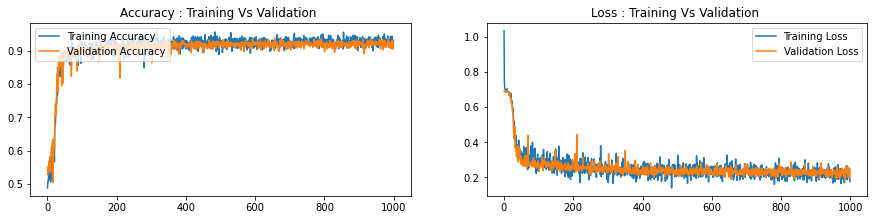

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1234
           1       0.90      0.96      0.93      1246

    accuracy                           0.92      2480
   macro avg       0.93      0.92      0.92      2480
weighted avg       0.93      0.92      0.92      2480



In [11]:
plot_loss_and_accuracy(x,y)

In [12]:
loaded_custom = load_model("custom.pkl")

In [13]:
y_pred = loaded_custom.predict(x_test)
for i in range(0,2480,1):
    if y_pred[i] >= 0.5:
        y_pred[i]=int(1)
    else:
        y_pred[i]=int(0)

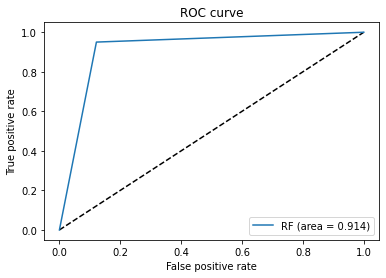

In [14]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [15]:
print('AUC = ',auc_rf)

AUC =  0.9107478644570065


D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


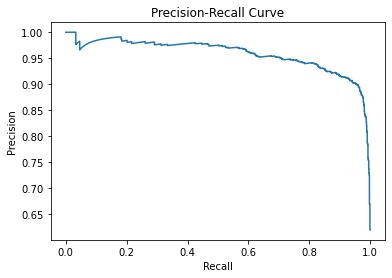

In [15]:
y_score = loaded_custom.predict_proba(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[1084,  150],
       [  62, 1184]], dtype=int64)

In [17]:
spec = cf[1][1]/(cf[1][1]+cf[0][1])
print('specificity = ',spec)

specificity =  0.8875562218890555


In [18]:
from datetime import datetime
time_array=[]
number=[]
for i in range (0,20,1):
    start = time.time()
    y_train_full_pred = loaded_custom.predict(x_train_full)
    end = time.time()
    time_taken = end - start
    print('Time: ',i+1,time_taken) 
    time_array.append(float(time_taken))
    number.append(i+1)

NameError: name 'x_train_full' is not defined

In [ ]:
print("Average time taken = ",sum(time_array)/len(time_array))

In [ ]:
plt.plot(number,time_array)
plt.title('Time taken')
plt.xlabel('Epoch')
plt.ylabel('Time taken')
plt.show()